In [1]:
# Imports
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

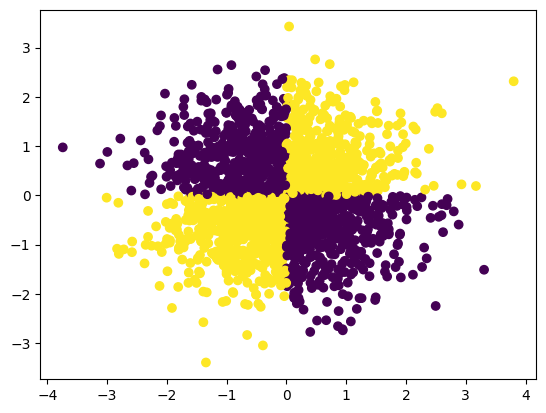

In [2]:
# Data
np.random.seed(0)
features = np.random.randn(2000, 2)
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

_, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=target)

In [3]:
# color regions
def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(("red", "blue"))
  xxl, xx2 = np.meshgrid(np.arange(-4, 4, 0.02), np.arange(-4, 4, 0.02))
  Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xxl.shape)
  plt.contourf(xxl, xx2, Z, alpha=0.1, cmap=cmap)

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker="+", label=cl)

<ipython-input-3-794fb1120516>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


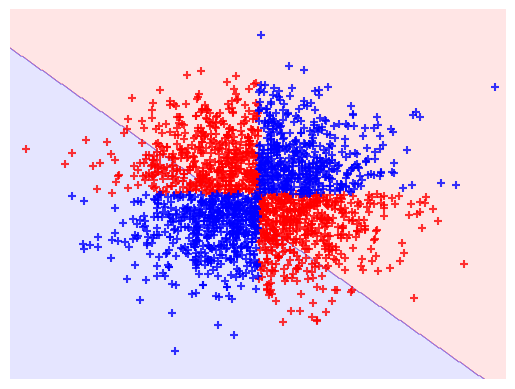

In [5]:
# Linear support vector classifier (SVC)
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# fit model
linear_model = svc_linear.fit(features, target)

# Visualize

plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

<ipython-input-3-794fb1120516>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


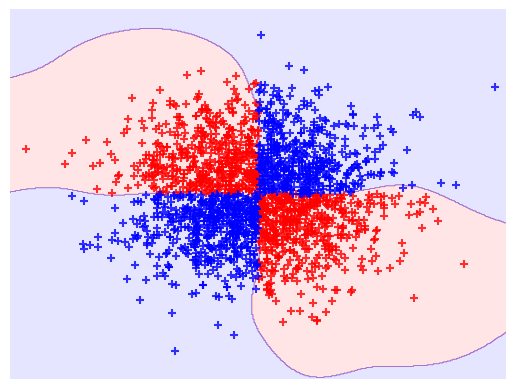

In [6]:
# RBF support vector classifier (SVC)
rbf_svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

rbf_model = rbf_svc.fit(features, target)

plot_decision_regions(features, target, classifier=rbf_svc)
plt.axis("off")
plt.show()

<ipython-input-3-794fb1120516>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


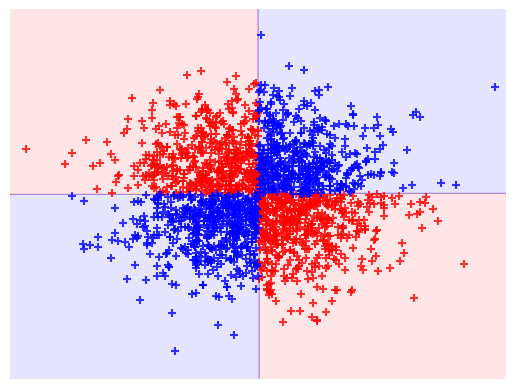

In [11]:
# Polynomial support vector classifier (SVC)
poly_svc = SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1)

poly_model = poly_svc.fit(features, target)

plot_decision_regions(features, target, classifier=poly_svc)
plt.axis("off")
plt.show()

<ipython-input-3-794fb1120516>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


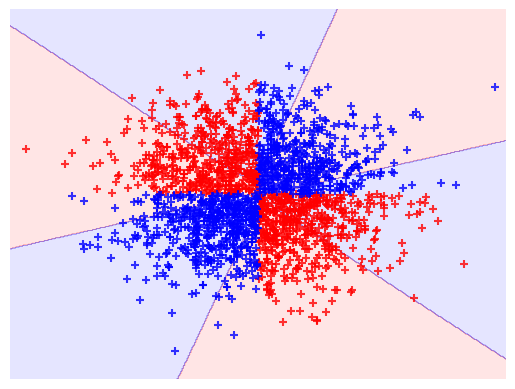

In [12]:
# Sigmoid support vector classifier (SVC)
sigm_svc = SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)

sigm_model = sigm_svc.fit(features, target)

plot_decision_regions(features, target, classifier=sigm_svc)
plt.axis("off")
plt.show()

In [13]:
# Models
models = {'Linear': SVC(kernel="linear", random_state=0, C=1),
          'RBF': SVC(kernel="rbf", random_state=0, gamma=1, C=1),
          'Polynomial': SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1),
          'Sigmoid': SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)}

In [14]:
# Indicators
indicators = ['accuracy', 'precision', 'recall', 'f1']

In [15]:
for name, model in models.items():
  print(name)

  for metric in indicators:
    score = cross_val_score(model, features, target, scoring=metric)
    print(f'  {metric}: {score}')

  print()

Linear
  accuracy: [0.5875 0.6    0.6125 0.6025 0.605 ]
  precision: [0.56521739 0.67521368 0.65753425 0.61581921 0.65217391]
  recall: [0.7761194  0.39303483 0.47761194 0.545      0.45      ]
  f1: [0.65408805 0.49685535 0.55331412 0.57824934 0.53254438]

RBF
  accuracy: [0.99   0.9875 0.9725 0.985  0.97  ]
  precision: [0.99004975 0.99494949 0.99479167 0.985      0.97959184]
  recall: [0.99004975 0.9800995  0.95024876 0.985      0.96      ]
  f1: [0.99004975 0.98746867 0.97201018 0.985      0.96969697]

Polynomial
  accuracy: [0.9925 0.9925 0.98   0.9925 0.9825]
  precision: [1.         1.         1.         0.99497487 1.        ]
  recall: [0.98507463 0.98507463 0.960199   0.99       0.965     ]
  f1: [0.9924812  0.9924812  0.97969543 0.9924812  0.9821883 ]

Sigmoid
  accuracy: [0.4825 0.485  0.485  0.5475 0.4925]
  precision: [0.48529412 0.48780488 0.48587571 0.55026455 0.49295775]
  recall: [0.49253731 0.49751244 0.4278607  0.52       0.525     ]
  f1: [0.48888889 0.49261084 0.455